In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

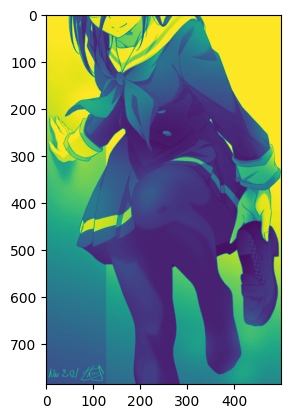

In [3]:
image = cv2.imread("../images/94147214_p0.png", flags=0)
plt.imshow(image)

# 傅里叶变换 dft

在图像处理过程中，傅里叶变换就是将图像分解为正弦分量和余弦分量两部分，即将图像 从空间域转换到频率域(以下简称频域)。数字图像经过傅里叶变换后，得到的频域值是复数。 因此，显示傅里叶变换的结果需要使用实数图像(real image)加虚数图像(complex image)， 或者幅度图像(magnitude image)加相位图像(phase image)的形式。

因为幅度图像包含了原图像中我们所需要的大部分信息，所以在图像处理过程中，通常仅使用幅度图像。当然，如果希望先在频域内对图像进行处理，再通过逆傅里叶变换得到修改后的空域图像，就必须同时保留幅度图像和相位图像。

对图像进行傅里叶变换后，我们会得到图像中的低频和高频信息。低频信息对应图像内变 化缓慢的灰度分量。高频信息对应图像内变化越来越快的灰度分量，是由灰度的尖锐过渡造成的。例如，在一幅大草原的图像中有一头狮子，低频信息就对应着广袤的颜色趋于一致的草原等细节信息，而高频信息则对应着狮子的轮廓等各种边缘及噪声信息。

傅里叶变换的目的，就是为了将图像从空域转换到频域，并在频域内实现对图像内特定对 象的处理，然后再对经过处理的频域图像进行逆傅里叶变换得到空域图像。傅里叶变换在图像处理领域发挥着非常关键的作用，可以实现图像增强、图像去噪、边缘检测、特征提取、图像压缩和加密等。

cv2.dft()

参数
- flags = 0:
    - DFT_INVERSE:        用一维或二维逆变换取代默认的正向变换
    - DFT_SCALE:          缩放比例标识符，根据数据元素个数平均求出其缩放结果，如有N个元素，则输出结果以1/N缩放输出，常与DFT_INVERSE搭配使用。
    - DFT_ROWS:           对输入矩阵的每行进行正向或反向的傅里叶变换；此标识符可在处理多种适量的的时候用于减小资源的开销，这些处理常常是三维或高维变换等复杂操作。
    - DFT_COMPLEX_OUTPUT: 对一维或二维的实数数组进行正向变换，这样的结果虽然是复数阵列，但拥有复数的共轭对称性（CCS），
                          可以以一个和原数组尺寸大小相同的实数数组进行填充，这是最快的选择也是函数默认的方法。你可能想要得到一个全尺寸的复数数组（像简单光谱分析等等），
                          通过设置标志位可以使函数生成一个全尺寸的复数输出数组。
    - DFT_REAL_OUTPUT:    对一维二维复数数组进行逆向变换，这样的结果通常是一个尺寸相同的复数矩阵，但是如果输入矩阵有复数的共轭对称性
                         （比如是一个带有DFT_COMPLEX_OUTPUT标识符的正变换结果），便会输出实数矩阵。
- int nonzeroRows = 0,    当这个参数不为0，函数会假设只有输入数组（没有设置DFT_INVERSE）的第一行或第一个输出数组（设置了DFT_INVERSE）包含非零值。
                          这样的话函数就可以对其他的行进行更高效的处理节省一些时间，这项技术尤其是在采用DFT计算矩阵卷积时非常有效。

### 1 输入图片需要单通道,加上另一个通道,最终输入为双通道

In [57]:
black = np.zeros(image.shape, dtype=np.float32)
image1 = np.stack([image, black], axis=-1)
image1.shape, image1.dtype

((787, 500, 2), dtype('float32'))

### 2 cv2.dft

In [58]:
image_dft = cv2.dft(
    src=image1,
    flags=cv2.DFT_COMPLEX_OUTPUT,
    nonzeroRows=0
)
image_dft.shape

(787, 500, 2)

### 3 np.fft.fftshift

In [59]:
image_fftshift = np.fft.fftshift(image_dft)
image_fftshift.shape

(787, 500, 2)

### 4 cv2.magnitude

In [60]:
image_magnitude = cv2.magnitude(
    x=image_fftshift[:, :, 0],
    y=image_fftshift[:, :, 1],
)
print(image_magnitude.shape)
print(image_magnitude.min(), image_magnitude.max())

(787, 500)
1.0461235 44296736.0


#### normalize

In [69]:
# normalize为了符合图片格式
image_normalize = cv2.normalize(
    src=image_magnitude,
    dst=None,
    alpha=0,
    beta=255,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8UC1,
)
print(image_normalize.min(), image_normalize.max())

0 255


Text(0.5, 1.0, 'image_normalize')

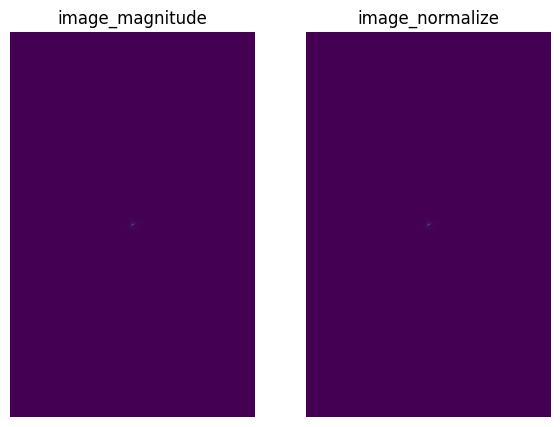

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axes[0].imshow(image_magnitude)
axes[0].axis(False)
axes[0].set_title("image_magnitude")
axes[1].imshow(image_normalize)
axes[1].axis(False)
axes[1].set_title("image_normalize")
# 标准化前后显示相同,不过数值不同

### 5 np.log 更好看出差别

In [67]:
image_log = np.log(image_magnitude)
print(image_log.min(), image_log.max())

0.045091428 17.606422


Text(0.5, 1.0, 'dft')

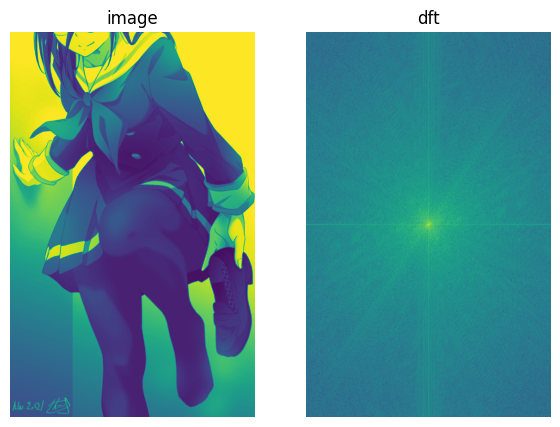

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
axes[0].imshow(image)
axes[0].axis(False)
axes[0].set_title("image")
axes[1].imshow(image_log)
axes[1].axis(False)
axes[1].set_title("dft")

# 逆傅里叶变换

### 1 输入图片需要单通道,加上另一个通道,最终输入为双通道

In [73]:
black = np.zeros(image.shape, dtype=np.float32)
image1 = np.stack([image, black], axis=-1)
image1.shape, image1.dtype

((787, 500, 2), dtype('float32'))

### 2 cv2.dft

In [74]:
image_dft = cv2.dft(
    src=image1,
    flags=cv2.DFT_COMPLEX_OUTPUT,
    nonzeroRows=0
)
image_dft.shape

(787, 500, 2)

### 3 np.fft.fftshift

In [75]:
image_fftshift = np.fft.fftshift(image_dft)
image_fftshift.shape

(787, 500, 2)

### 4.np.fft.ifftshift

In [76]:
image_ifftshift = np.fft.ifftshift(image_fftshift)
image_ifftshift.shape

(787, 500, 2)

### 5 cv2.idft

In [77]:
image_idft = cv2.idft(
    src=image_ifftshift,
    flags=cv2.DFT_COMPLEX_OUTPUT,
    nonzeroRows=0
)
image_idft.shape

(787, 500, 2)

### 6 cv2.magnitude

In [78]:
image_magnitude = cv2.magnitude(
    x=image_idft[:, :, 0],
    y=image_idft[:, :, 1],
)
print(image_magnitude.shape)
print(image_magnitude.min(), image_magnitude.max())

(787, 500)
787010.2 100342550.0


#### normalize

In [79]:
# normalize为了符合图片格式
image_normalize = cv2.normalize(
    src=image_magnitude,
    dst=None,
    alpha=0,
    beta=255,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8UC1,
)
print(image_normalize.min(), image_normalize.max())

0 255


Text(0.5, 1.0, 'image_normalize')

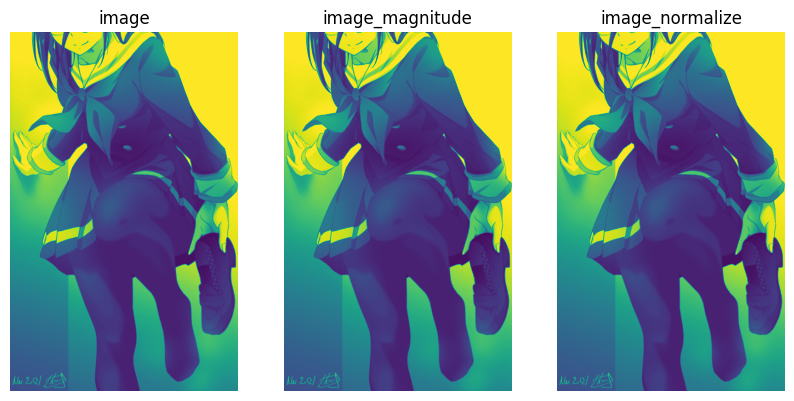

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis(False)
axes[0].set_title("image")
axes[1].imshow(image_magnitude)
axes[1].axis(False)
axes[1].set_title("image_magnitude")
axes[2].imshow(image_normalize)
axes[2].axis(False)
axes[2].set_title("image_normalize")
# 标准化前后显示相同,不过数值不同